# Fashion MNIST

In [1]:
import pandas as pd
import numpy as np

In [2]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

In [3]:
import tensorflow as tf

(X, y), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X.shape

(60000, 28, 28)

In [5]:
X = X[:1000]

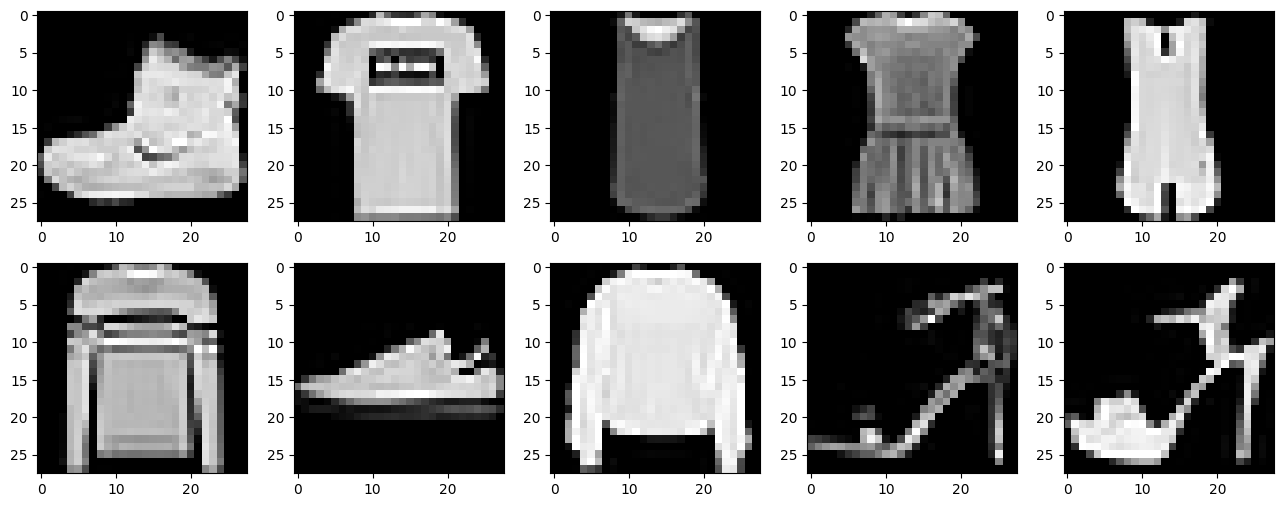

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:], cmap='gray')

In [8]:
X = X.reshape(X.shape[0], -1)
X.shape

(1000, 784)

In [9]:
X.min(axis=0)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [10]:
X.max(axis=0)[:10]

array([  0,   2,  52,  55,  54, 170, 195, 170, 181, 237], dtype=uint8)

Дополнительные материалы и масштабирование данных:
https://youtu.be/XsuCOfpf8Ic

In [11]:
# X.mean(axis=0)[:10]

**Нормализация** - MinMaxScaler() Для каждой фичи x делает:
$$\frac{x_i - min}{max - min}$$
После нормализации признак будет изменяться в диапазоне [0, 1].<br>
Лучше зарекомендовала себя в моделях, которые работают с расстояниями (KNN).

<br>

**Стандартизация** - StandardScaler(). Для каждой фичи х делает:
$$\frac{x_i- mean}{std}$$
После стандартизации у признака будут mean = 0, std = 1.<br>
Лучше зарекомендовала себя в линейных моделях.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X.min(axis=0)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
X.max(axis=0)[:10]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
# X_test = scaler.transform(X_test)

## Понижение размерности

In [17]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1000, 2)

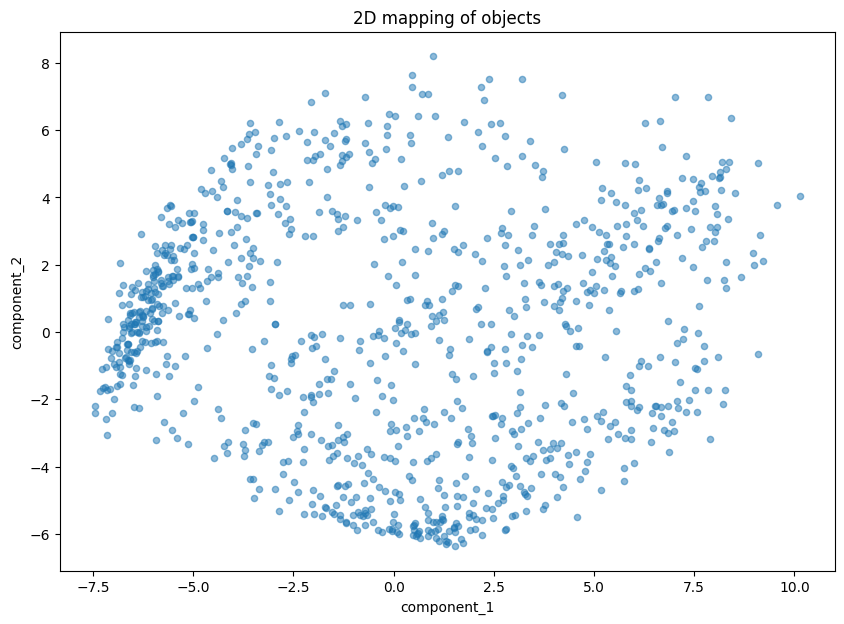

In [19]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

**TSNE**

In [20]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, perplexity=20)  # 1 - 50

X_tsne = tsne.fit_transform(X)

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 39.2 s
Wall time: 3.6 s


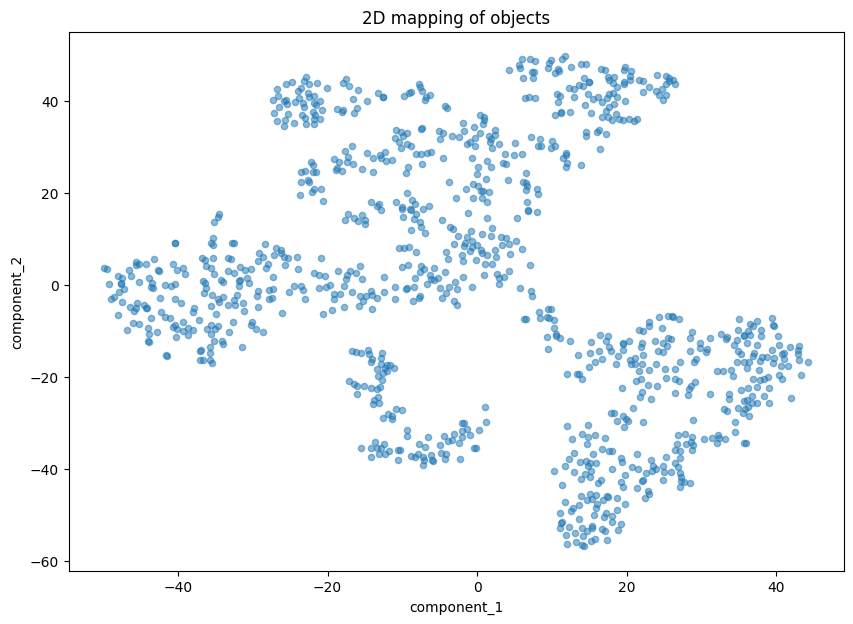

In [21]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

## Кластеризация

**KMeans**

In [22]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [23]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

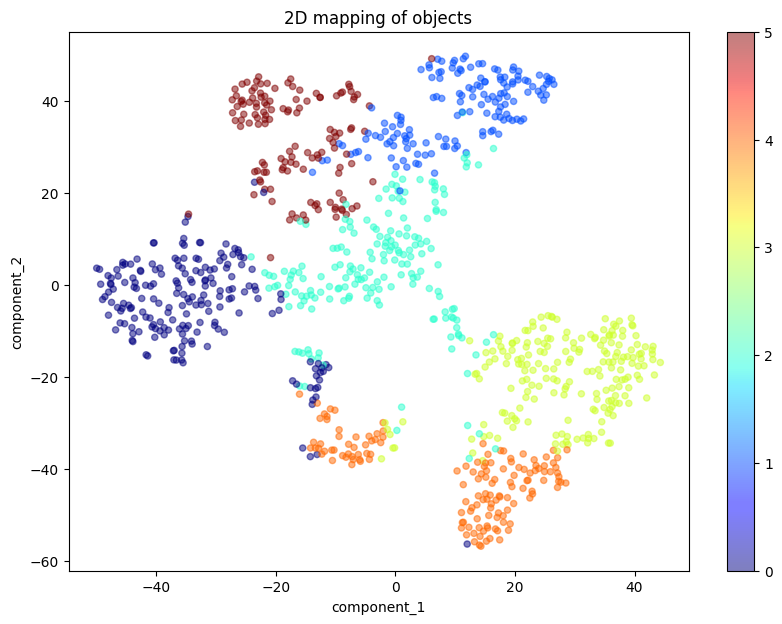

In [24]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

**AgglomerativeClustering**

In [25]:
%%time
aggl = AgglomerativeClustering(n_clusters=6)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

CPU times: total: 516 ms
Wall time: 509 ms


In [26]:
labels_clast

0      0
1      3
2      4
3      4
4      3
      ..
995    1
996    3
997    4
998    0
999    0
Length: 1000, dtype: int64

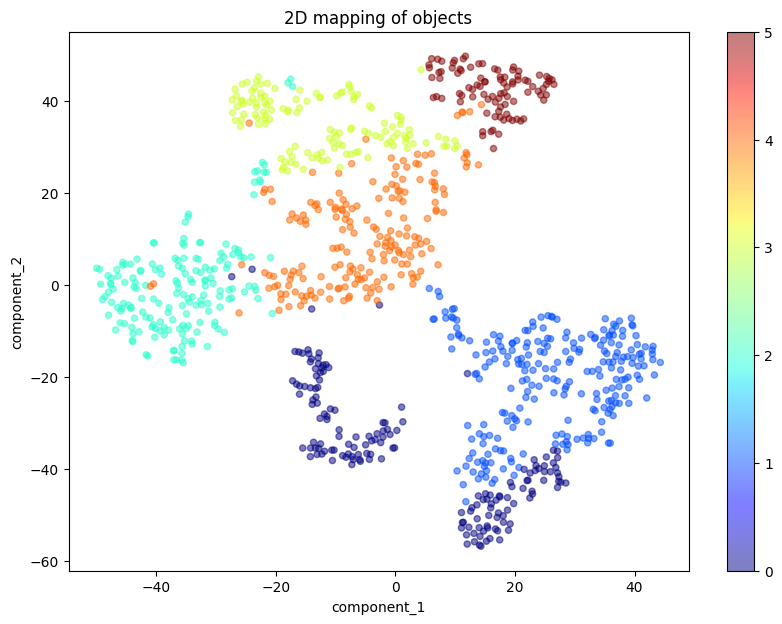

In [27]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

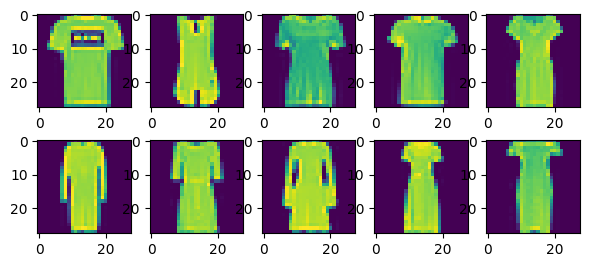

In [28]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 3][i,:].reshape([28, 28]))

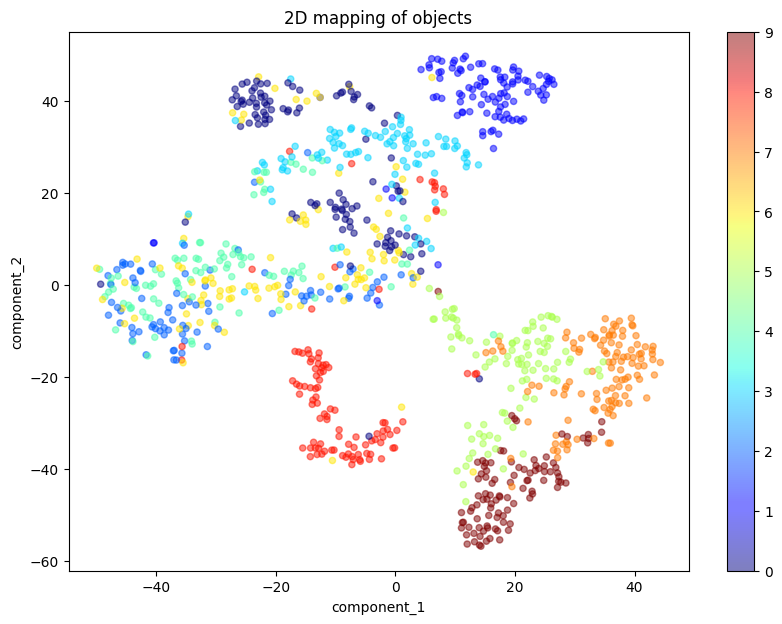

In [29]:
display_components_in_2D_space(components_X_tsne, labels=y)

# Практическое задание

Визуализация набора данных MNIST

In [31]:
from sklearn import datasets


digits = datasets.load_digits()
X = digits.data
y = digits.target

Дополнительные материалы и масштабирование данных:
https://youtu.be/XsuCOfpf8Ic

In [32]:
from sklearn.preprocessing import MinMaxScaler

# масштабирование данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
X.min(axis=0)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
X.shape

(1797, 64)

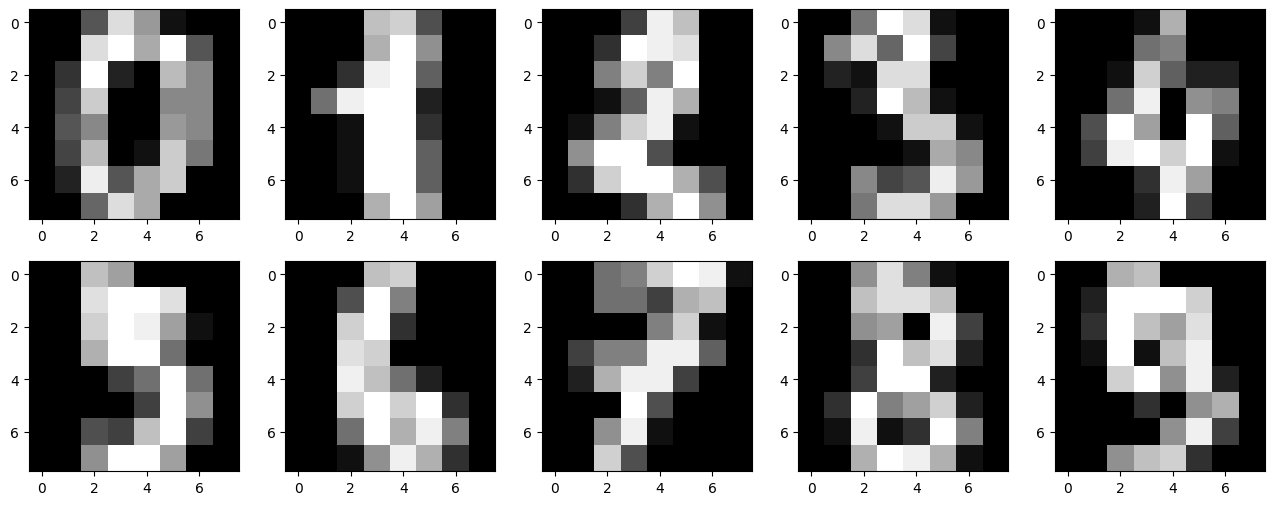

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

## Понижение размерности

**PCA**

In [37]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1797, 2)

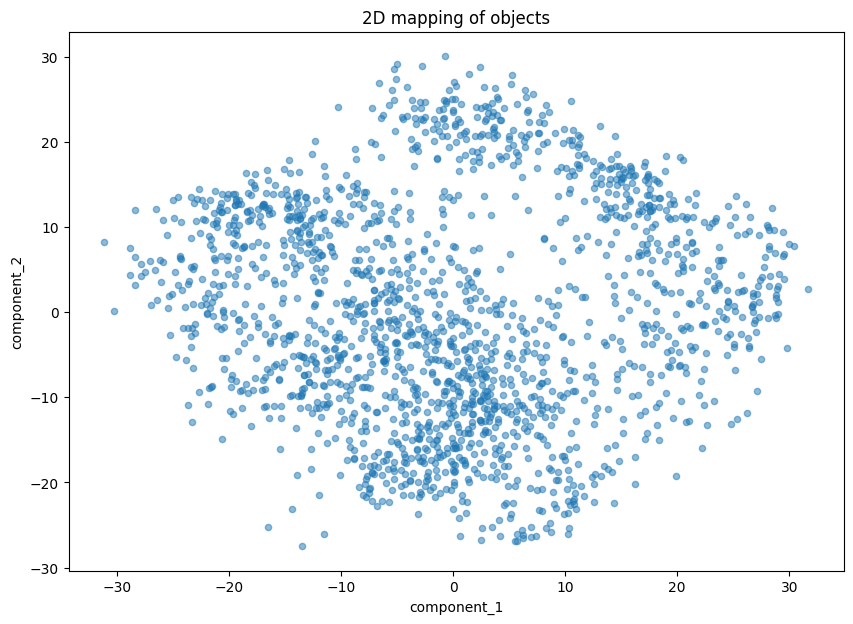

In [38]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

**TSNE**

In [40]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, perplexity=10)  # 1 - 50

X_tsne = tsne.fit_transform(X)

C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Константин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 1min 2s
Wall time: 5.43 s


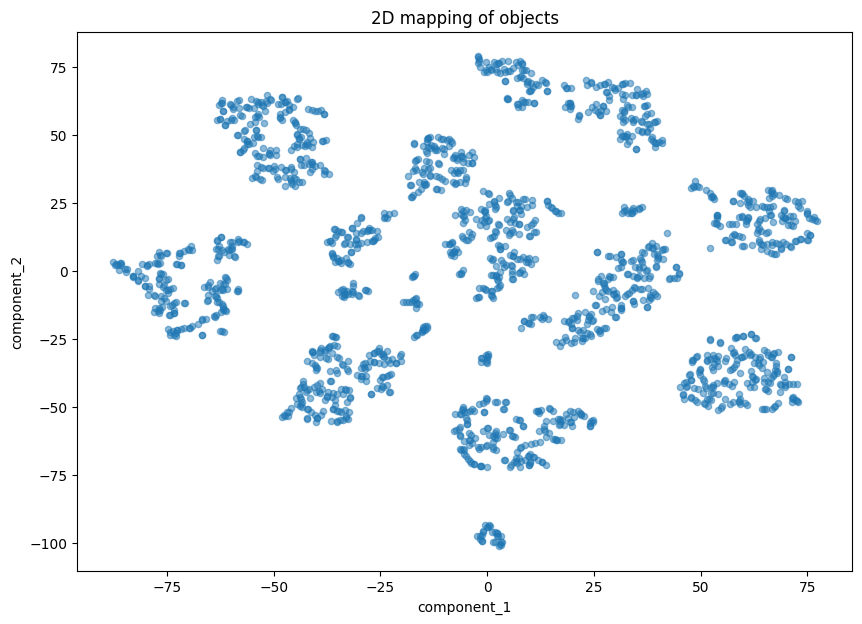

In [41]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

## Кластеризация

**KMeans**

In [45]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

In [46]:
labels_clast

0       0
1       5
2       5
3       9
4       6
       ..
1792    1
1793    0
1794    5
1795    1
1796    1
Name: clusters, Length: 1797, dtype: int32

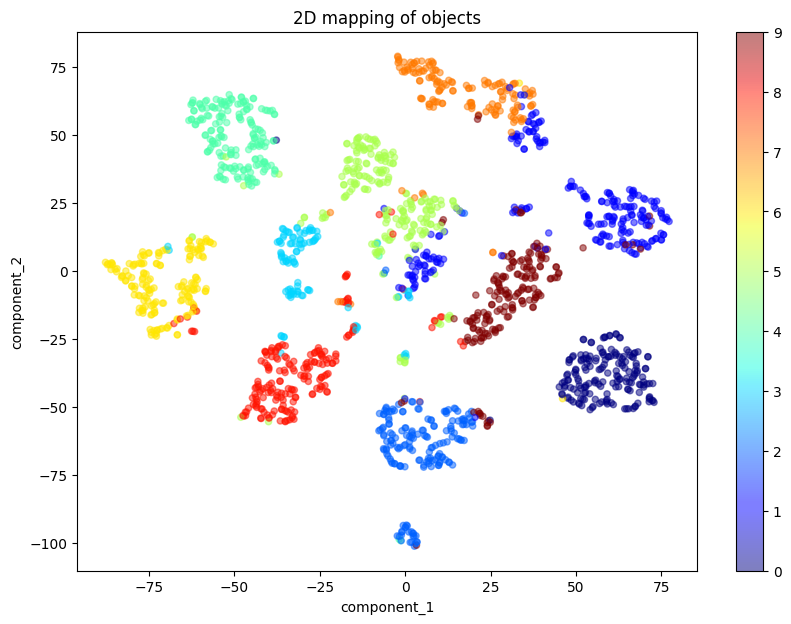

In [47]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

**AgglomerativeClustering**

In [49]:
%%time
aggl = AgglomerativeClustering(n_clusters=10)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

CPU times: total: 234 ms
Wall time: 237 ms


In [50]:
labels_clast

0       7
1       9
2       4
3       1
4       5
       ..
1792    1
1793    7
1794    4
1795    1
1796    4
Length: 1797, dtype: int64

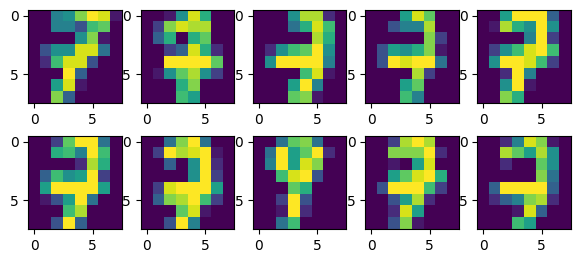

In [54]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 3][i,:].reshape([8, 8]))

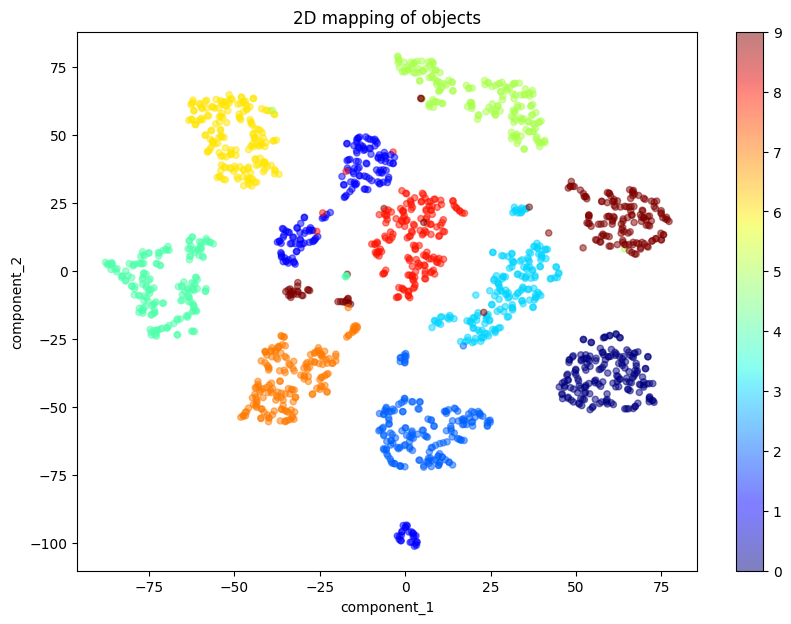

In [55]:
display_components_in_2D_space(components_X_tsne, labels=y)

# Дополнительные материалы:

1. Какие задачи бывают в машинном обучении https://youtu.be/ku2oPMPht2I
2. Масштабирование данных https://youtu.be/XsuCOfpf8Ic
